# Short Project 4: Seattle Bicycle Project

## Load Data

In [17]:
require(ggplot2)
require(scales)

Loading required package: scales



In [1]:
FremontBridge <- read.csv("FremontBridge.csv", header=TRUE) 
str(FremontBridge)

'data.frame':	29880 obs. of  3 variables:
 $ Date                        : chr  "10/03/2012 12:00:00 AM" "10/03/2012 01:00:00 AM" "10/03/2012 02:00:00 AM" "10/03/2012 03:00:00 AM" ...
 $ Fremont.Bridge.West.Sidewalk: int  4 4 1 2 6 21 105 257 291 172 ...
 $ Fremont.Bridge.East.Sidewalk: int  9 6 1 3 1 10 50 95 146 104 ...


## Clean Data

In [2]:
FremontBridge$Date <- as.POSIXct(strptime(FremontBridge$Date, 
"%m/%d/%Y %I:%M:%S %p", tz = "PST8PDT")) # in Seattle 
FremontBridge$Weekday<- weekdays(FremontBridge$Date) 
FremontBridge$Weekday<- as.Date(FremontBridge$Date)

In [3]:
FremontBridge$East <- FremontBridge$Fremont.Bridge.East.Sidewalk 
FremontBridge$West <- FremontBridge$Fremont.Bridge.West.Sidewalk 
 
FremontBridge$East[is.na(FremontBridge$East)] <- as.integer(0) 
FremontBridge$West[is.na(FremontBridge$West)] <- as.integer(0) 
 
FremontBridge$Total <- FremontBridge$East + FremontBridge$West

In [80]:
FremontBridge$hour <- format(FremontBridge$Date, "%H") 
FremontBridge$dates <- as.Date(FremontBridge$Date, tz = "PST8PDT") 
FremontBridge$week <- as.Date(cut(FremontBridge$Date, 
                        breaks = "week", 
                        start.on.monday = TRUE)) # weekly break 
#point to Monday (default) 
 
FremontBridge$month <- as.Date(cut(FremontBridge$Date, 
                        breaks = "month")) 
#FremontBridge

## Visualize Data

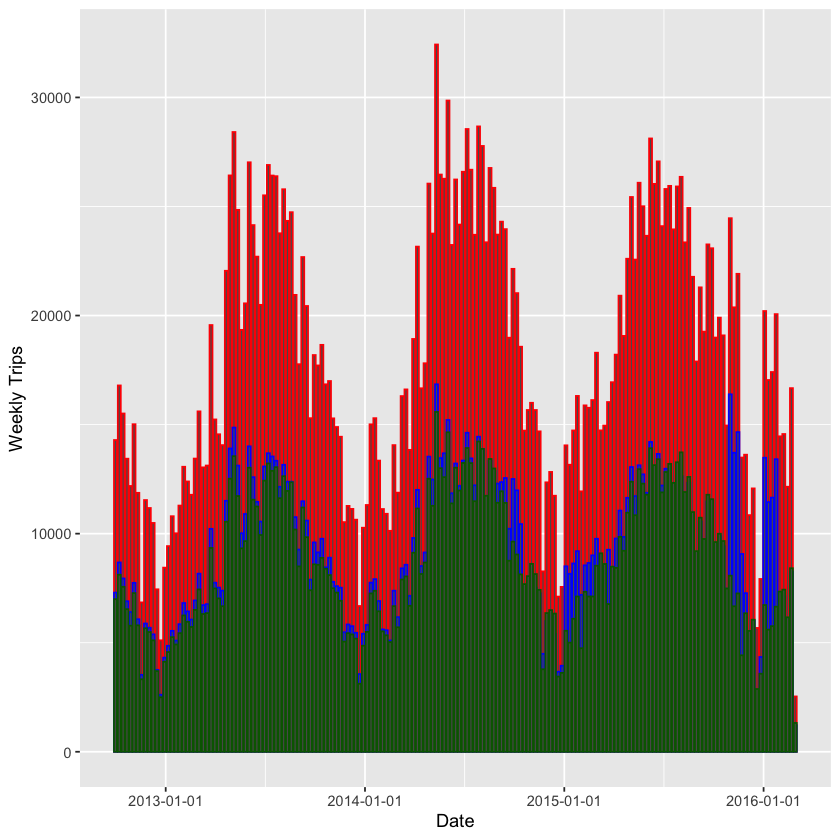

In [29]:
ggplot(FremontBridge) + 
       stat_summary(aes(x=week, y=Total), fun = sum, 
                    geom = "bar", color = "red") + 
       stat_summary(aes(x=week,y=West), fun = sum, 
                    geom = "bar",  color = "blue") + 
       stat_summary(aes(x=week,y=East), fun = sum, 
                    geom = "bar", color = "darkgreen") + 
       scale_x_date(date_breaks = "1 year") + 
       xlab("Date") + 
       ylab("Weekly Trips")

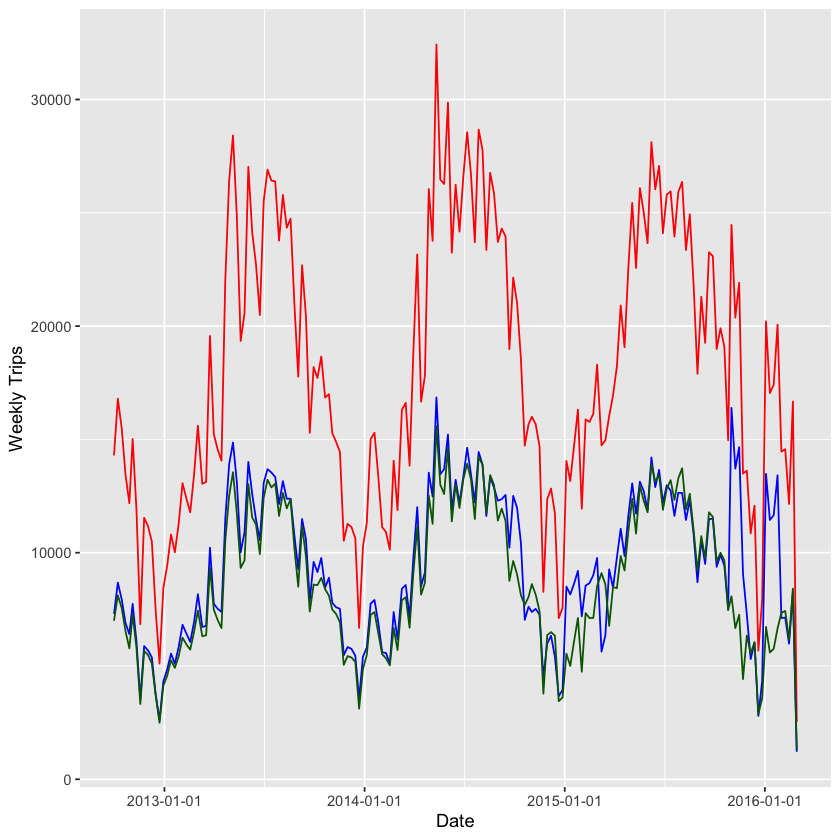

In [31]:
ggplot(FremontBridge) + 
       stat_summary(aes(x=week, y=Total), fun = sum, # adds up 
               geom = "line", color = "red") + 
       stat_summary(aes(x=week,y=West), fun = sum, # adds up all  
               geom = "line",  color = "blue") + 
       stat_summary(aes(x=week,y=East), fun = sum, # adds up all 
               geom = "line", color = "darkgreen") + 
  scale_x_date(breaks = date_breaks(width = "1 year")) + 
  xlab("Date") + 
  ylab("Weekly Trips")

## Prepare Data for ML

In [81]:
FremontBridgePivot <- read.csv("FremontBridgePivotnoTotals.csv", header=TRUE)
#FremontBridgePivot

## Principal Component Analysis

In [46]:
FB.hours <- FremontBridgePivot[, 3:49] 
#FB.hours

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6    PC7
Standard deviation     3.9063 3.7307 1.64046 1.39854 1.32440 1.29295 1.1328
Proportion of Variance 0.3247 0.2961 0.05726 0.04162 0.03732 0.03557 0.0273
Cumulative Proportion  0.3247 0.6208 0.67805 0.71966 0.75698 0.79255 0.8198
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     1.05672 0.92329 0.89079 0.83996 0.79540 0.77964 0.74374
Proportion of Variance 0.02376 0.01814 0.01688 0.01501 0.01346 0.01293 0.01177
Cumulative Proportion  0.84361 0.86175 0.87863 0.89364 0.90710 0.92004 0.93181
                         PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     0.7092 0.64236 0.55006 0.53154 0.48016 0.43033 0.42563
Proportion of Variance 0.0107 0.00878 0.00644 0.00601 0.00491 0.00394 0.00385
Cumulative Proportion  0.9425 0.95129 0.95773 0.96374 0.96864 0.97258 0.97644
                          PC22    PC23    

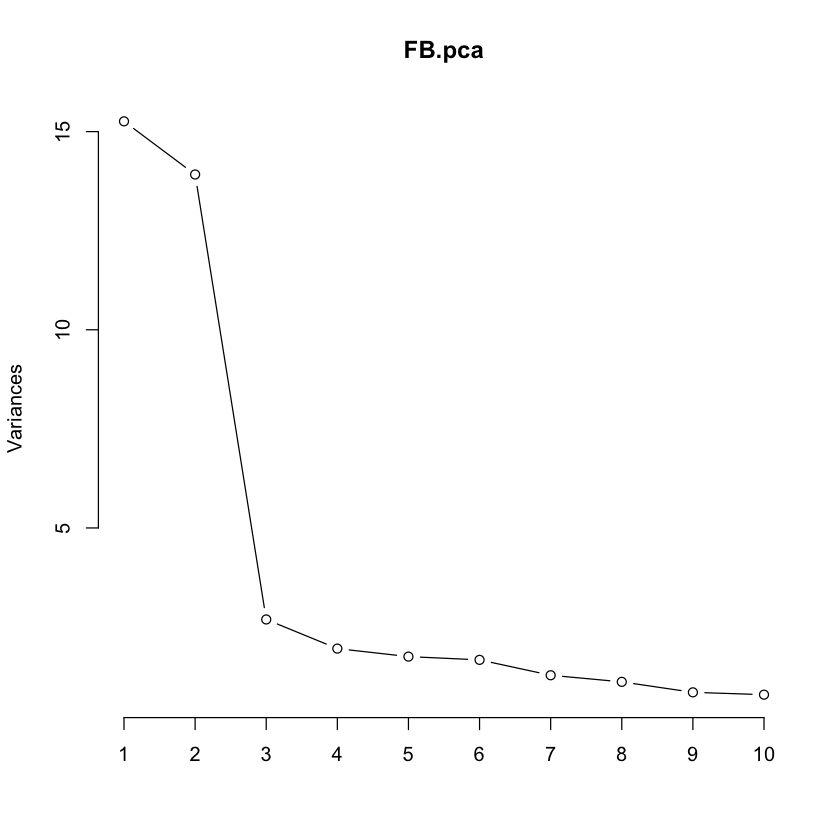

In [47]:
FB.pca <- prcomp(FB.hours, center = TRUE, scale = TRUE) 
plot(FB.pca, type = "l") 
summary(FB.pca)

Only PCA 1, 2, and 3 should be kept for this model. They are the only ones with high enough variances for us to be able to have good seperation between the data. You can tell this from the graph above, the hockey stick plot. 

## More Visualizations and Conclusions

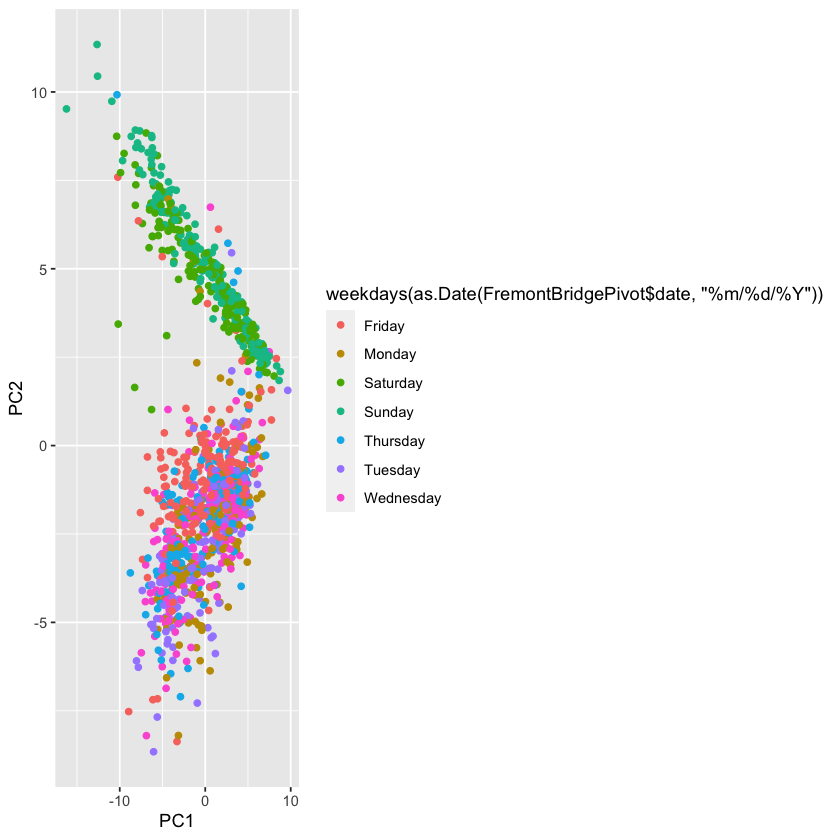

In [62]:
scores <- data.frame(FB.pca$x[,1:2]) 
qplot(x=PC1, y=PC2, data=scores, 
      color=weekdays(as.Date(FremontBridgePivot$date, "%m/%d/%Y")))

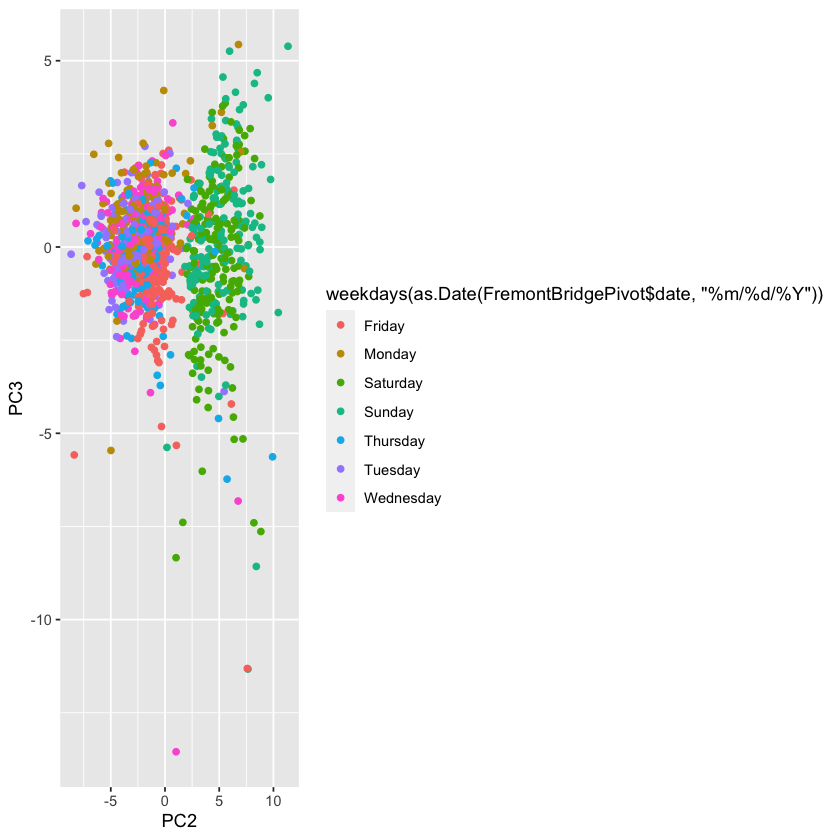

In [79]:
scores <- data.frame(FB.pca$x[,2:3]) 
qplot(x=PC2, y=PC3, data=scores, 
      color=weekdays(as.Date(FremontBridgePivot$date, "%m/%d/%Y")))

From the plots above we can see a seperation in the data between the weekend days and the weekdays. It is possible that bicycles were either used more often or less often on weekends which is now showing up in the PCA plot. 

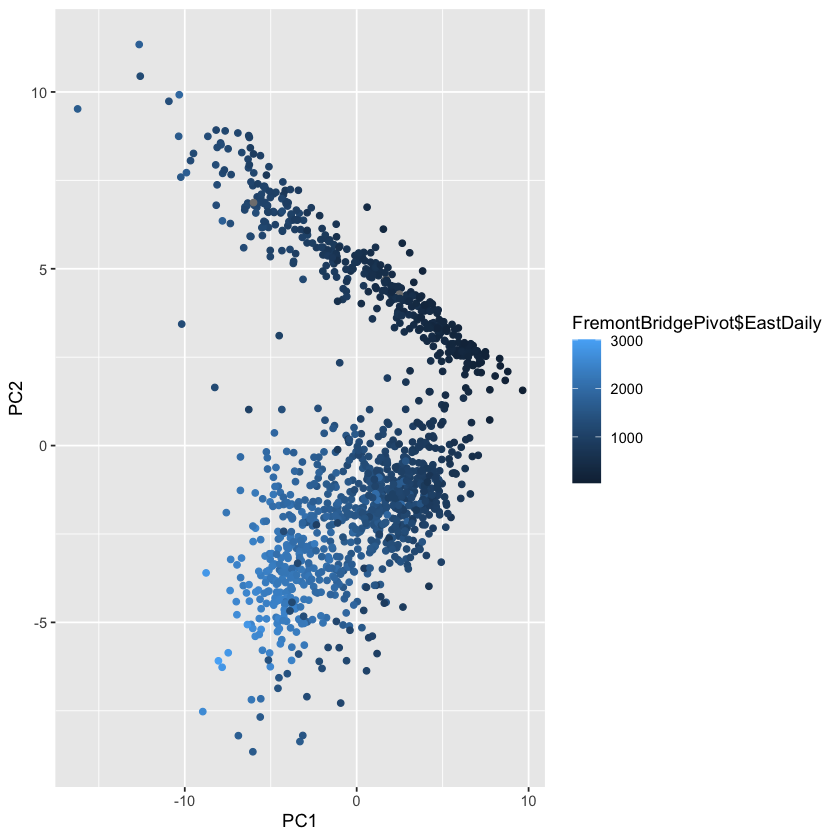

In [74]:
scores <- data.frame(FB.pca$x[,1:2]) 
qplot(x=PC1, y=PC2, data=scores, color=FremontBridgePivot$EastDaily)

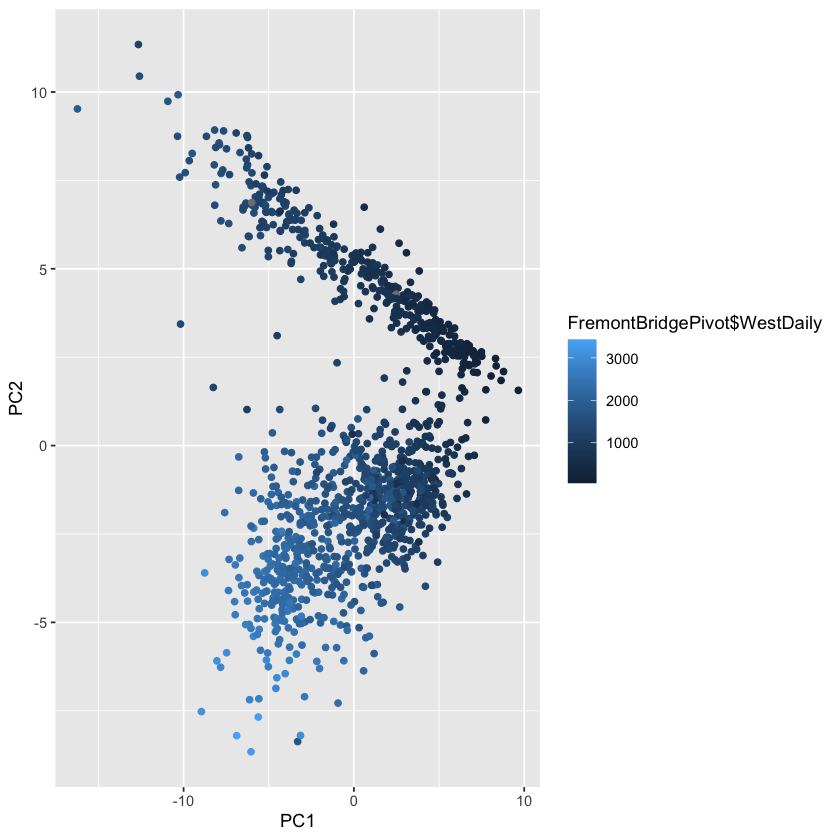

In [78]:
scores <- data.frame(FB.pca$x[,1:2]) 
qplot(x=PC1, y=PC2, data=scores, color=FremontBridgePivot$WestDaily)

What these two PCAs tell me is that the data that was usually correlated with the weekends is also correlated with lower daily bikes. So my hypothesis that bikes were potentially differently used on weekends was about right!